In [380]:
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats

In [381]:
Claims = pd.read_csv('claims.csv')

In [382]:
Cust_demo = pd.read_csv('cust_demographics.csv')

In [383]:
Claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [384]:
Claims.shape

(1100, 10)

In [385]:
Cust_demo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [386]:
Cust_demo.shape

(1085, 6)

## 1. Import claims_data.csv and cust_data.csv which is provided to you and 
## combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [387]:
Data_360 = pd.merge(left = Claims , right = Cust_demo , left_on = 'customer_id', right_on = 'CUST_ID', how = 'left')

In [388]:
Data_360.shape

(1100, 16)

In [389]:
Data_360.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver


In [390]:
Data_360.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  CUST_ID              1085 non-null   float64
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [391]:
Data_360 = Data_360.drop('CUST_ID', axis = 1)

In [392]:
Data_360.shape

(1100, 15)

In [393]:
Data_360= Data_360.loc[:,['claim_id','customer_id','incident_cause','claim_date','claim_area','police_report','claim_type','claim_amount',
                          'total_policy_claims','fraudulent','gender','DateOfBirth','State','Contact','Segment']]

In [394]:
Data_360.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver


## 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.



In [395]:
Data_360.shape

(1100, 15)

In [396]:
Data_360.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [397]:
Data_360['Claim_date'] = pd.to_datetime(Data_360['claim_date'],format='%m/%d/%Y')

In [398]:
Data_360["Contact"] = Data_360['Contact'].str.replace("-",'')
Data_360['Contact']  = Data_360['Contact'].astype('str')

In [399]:
Data_360['claim_id'] = Data_360['claim_id'].astype('object')
Data_360['customer_id'] = Data_360['customer_id'].astype('object')

In [400]:
Data_360.dtypes

claim_id                       object
customer_id                    object
incident_cause                 object
claim_date                     object
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth                    object
State                          object
Contact                        object
Segment                        object
Claim_date             datetime64[ns]
dtype: object

In [401]:
Data_360.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Claim_date
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,7899168172,Platinum,2017-11-27
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,2655431264,Silver,2018-10-03


In [402]:
Data_360.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   object        
 1   customer_id          1100 non-null   object        
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   object        
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   object        
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   object        
 12  State                1085 non-null   object        
 13  Contact              1100 non-nul

## 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [403]:
Data_360['claim_amount'] = Data_360['claim_amount'].str.replace('$','')
Data_360['claim_amount']  = Data_360['claim_amount'].astype('float64')

In [404]:
Data_360.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Claim_date
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,7899168172,Platinum,2017-11-27
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,2655431264,Silver,2018-10-03


In [405]:
Data_360.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   object        
 1   customer_id          1100 non-null   object        
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   object        
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   float64       
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   object        
 12  State                1085 non-null   object        
 13  Contact              1100 non-nul

In [406]:
Data_360.shape

(1100, 16)

## 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

In [407]:
Data_360['claim_type'].unique()

array(['Material only', 'Injury only', 'Material and injury'],
      dtype=object)

In [408]:
Data_360['police_report'].unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

In [409]:
def create_flag(Data_360x):
    if((Data_360x['claim_type'] =='Injury only')|(Data_360x['claim_type']=='Material and injury')):
        if((Data_360x['police_report'] =='No')|(Data_360x['police_report']=='Unknown')):
            return (1)
        else:
            return(0)
    else:
        return(0)

In [410]:
Data_360['flag'] = Data_360.apply(lambda Data_360x: create_flag(Data_360x),axis=1)

In [411]:
Data_360[Data_360['claim_type']=='Injury only'].head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Claim_date,flag
5,24050443,21831191,Other driver error,10/04/2017,Auto,No,Injury only,38306.5,3.0,Yes,Male,17-May-77,NH,4197128513,Gold,2017-10-04,1
14,67257404,18288638,Other driver error,04/24/2018,Auto,Yes,Injury only,32560.0,1.0,No,Female,14-Jan-69,MI,3141351359,Platinum,2018-04-24,0
17,7809917,63916778,Other causes,07/22/2017,Auto,No,Injury only,17800.0,1.0,No,Male,07-Sep-66,IL,1461574572,Platinum,2017-07-22,1


In [412]:
Data_360.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   object        
 1   customer_id          1100 non-null   object        
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   object        
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   float64       
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   object        
 12  State                1085 non-null   object        
 13  Contact              1100 non-nul

In [413]:
Data_360.shape

(1100, 17)

##  5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID 
## should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column

In [414]:
Data_360['customer_id'].duplicated().sum()

7

In [415]:
Data_360 = Data_360.drop_duplicates(subset='customer_id', keep='first')
Data_360 = Data_360.reset_index()
Data_360 = Data_360.iloc[:,1:]

In [416]:
Data_360 = Data_360.sort_values(by=['customer_id', 'claim_date'], ascending=[True, False])
Data_360

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Claim_date,flag
184,69348631,154557,Driver error,04/10/2018,Auto,No,Injury only,NaN,1.0,Yes,Female,23-May-78,DE,9628791238,Platinum,2018-04-10,1
829,40953049,263204,Other causes,04/04/2018,Auto,No,Material and injury,39192.0,1.0,Yes,Male,20-Dec-72,TX,1738926314,Silver,2018-04-04,1
670,45780237,287476,Natural causes,10/17/2017,Auto,Unknown,Material only,1621.5,2.0,Yes,Male,28-Jul-88,FL,3645981549,Silver,2017-10-17,0
821,89833962,441097,Other causes,03/21/2018,Auto,Yes,Material and injury,37040.0,1.0,No,Male,19-Aug-71,CA,1873488375,Gold,2018-03-21,0
505,35782742,524545,Other driver error,07/27/2018,Auto,No,Injury only,35250.0,3.0,No,Female,10-Aug-80,NC,7988625398,Gold,2018-07-27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,4549014,99674324,Other causes,07/07/2018,Auto,No,Injury only,21480.0,1.0,No,Male,28-Jan-65,UT,5175624916,Silver,2018-07-07,1
992,35453672,99723844,Natural causes,01/06/2018,Auto,Yes,Material and injury,14360.0,1.0,No,Female,19-Jun-66,HI,4577521374,Gold,2018-01-06,0
68,37305754,99761663,Natural causes,04/04/2018,Auto,No,Material only,1242.0,1.0,Yes,Female,18-Nov-63,NC,6432464718,Silver,2018-04-04,0
929,22960702,99892000,Driver error,11/13/2017,Auto,No,Material only,2415.0,2.0,Yes,Male,08-Jun-95,OR,3952466172,Gold,2017-11-13,0


In [417]:
Data_360.shape

(1093, 17)

 ##6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [418]:
Data_360.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                 15
DateOfBirth            15
State                  15
Contact                 0
Segment                15
Claim_date              0
flag                    0
dtype: int64

In [419]:
Data_360.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1093 entries, 184 to 740
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1093 non-null   object        
 1   customer_id          1093 non-null   object        
 2   incident_cause       1093 non-null   object        
 3   claim_date           1093 non-null   object        
 4   claim_area           1093 non-null   object        
 5   police_report        1093 non-null   object        
 6   claim_type           1093 non-null   object        
 7   claim_amount         1028 non-null   float64       
 8   total_policy_claims  1083 non-null   float64       
 9   fraudulent           1093 non-null   object        
 10  gender               1078 non-null   object        
 11  DateOfBirth          1078 non-null   object        
 12  State                1078 non-null   object        
 13  Contact              1093 non-null   

In [420]:
Cat_col = ['gender', 'State', 'Segment', 'DateOfBirth', 'total_policy_claims']

In [421]:
for col in Cat_col:
    mode_val= Claim_demo[col].mode().values[0]
    Claim_demo.fillna(mode_val, inplace= True)


In [423]:
Data_360['claim_amount'] = Data_360['claim_amount'].fillna(Data_360['claim_amount'].mean())

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Claim_date,flag
184,69348631,154557,Driver error,04/10/2018,Auto,No,Injury only,12444.72714,1.0,Yes,Female,23-May-78,DE,9628791238,Platinum,2018-04-10,1
829,40953049,263204,Other causes,04/04/2018,Auto,No,Material and injury,39192.00000,1.0,Yes,Male,20-Dec-72,TX,1738926314,Silver,2018-04-04,1
670,45780237,287476,Natural causes,10/17/2017,Auto,Unknown,Material only,1621.50000,2.0,Yes,Male,28-Jul-88,FL,3645981549,Silver,2017-10-17,0
821,89833962,441097,Other causes,03/21/2018,Auto,Yes,Material and injury,37040.00000,1.0,No,Male,19-Aug-71,CA,1873488375,Gold,2018-03-21,0
505,35782742,524545,Other driver error,07/27/2018,Auto,No,Injury only,35250.00000,3.0,No,Female,10-Aug-80,NC,7988625398,Gold,2018-07-27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,4549014,99674324,Other causes,07/07/2018,Auto,No,Injury only,21480.00000,1.0,No,Male,28-Jan-65,UT,5175624916,Silver,2018-07-07,1
992,35453672,99723844,Natural causes,01/06/2018,Auto,Yes,Material and injury,14360.00000,1.0,No,Female,19-Jun-66,HI,4577521374,Gold,2018-01-06,0
68,37305754,99761663,Natural causes,04/04/2018,Auto,No,Material only,1242.00000,1.0,Yes,Female,18-Nov-63,NC,6432464718,Silver,2018-04-04,0
929,22960702,99892000,Driver error,11/13/2017,Auto,No,Material only,2415.00000,2.0,Yes,Male,08-Jun-95,OR,3952466172,Gold,2017-11-13,0


In [425]:
Claim_demo.isnull().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
dtype: int64

In [426]:
Claim_demo.shape

(1100, 15)

In [427]:
Claim_demo.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,Male,13-May-77,NV,956-871-8691,Gold


##7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
# Children < 18
# Youth 18-30
# Adult 30-60
# Senior > 60


In [428]:
Data_360['DateOfBirth'] = pd.to_datetime(Data_360['DateOfBirth'],format='%d-%b-%y')
Data_360.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Claim_date,flag
184,69348631,154557,Driver error,04/10/2018,Auto,No,Injury only,12444.72714,1.0,Yes,Female,1978-05-23,DE,9628791238,Platinum,2018-04-10,1
829,40953049,263204,Other causes,04/04/2018,Auto,No,Material and injury,39192.00000,1.0,Yes,Male,1972-12-20,TX,1738926314,Silver,2018-04-04,1
670,45780237,287476,Natural causes,10/17/2017,Auto,Unknown,Material only,1621.50000,2.0,Yes,Male,1988-07-28,FL,3645981549,Silver,2017-10-17,0
821,89833962,441097,Other causes,03/21/2018,Auto,Yes,Material and injury,37040.00000,1.0,No,Male,1971-08-19,CA,1873488375,Gold,2018-03-21,0
505,35782742,524545,Other driver error,07/27/2018,Auto,No,Injury only,35250.00000,3.0,No,Female,1980-08-10,NC,7988625398,Gold,2018-07-27,1


In [429]:
Data_360['age'] = np.abs(2024- Data_360['DateOfBirth'].dt.year )

In [430]:
Data_360.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Claim_date,flag,age
184,69348631,154557,Driver error,04/10/2018,Auto,No,Injury only,12444.72714,1.0,Yes,Female,1978-05-23,DE,9628791238,Platinum,2018-04-10,1,46
829,40953049,263204,Other causes,04/04/2018,Auto,No,Material and injury,39192.00000,1.0,Yes,Male,1972-12-20,TX,1738926314,Silver,2018-04-04,1,52


In [431]:
Data_360['age'].max()

55

In [432]:
Data_360['age_category'] = pd.cut(Data_360['age'],[0,18,30,60,100],labels=['Children','Youth','Adult','Senior'])

In [433]:
Data_360.groupby('age_category')['claim_amount'].mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_19244\813979596.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Data_360.groupby('age_category')['claim_amount'].mean()


age_category
Children             NaN
Youth       12561.627734
Adult       12422.593622
Senior               NaN
Name: claim_amount, dtype: float64

In [434]:
Data_360[Data_360['claim_date']<='2018-09-10'].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                 7.642756e+05
Driver error          3.545806e+06
Natural causes        1.389928e+06
Other causes          4.277400e+06
Other driver error    3.624678e+06
Name: claim_amount, dtype: float64

# 8. What is the average amount claimed by the customers from various segments?

In [435]:
Data_360.groupby('Segment')['claim_amount'].mean().reset_index()

,Segment,claim_amount
0,Gold,12675.262946
1,Platinum,12368.233815
2,Silver,12267.349306


# 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [436]:
Data_360[Data_360.claim_date < "2018-09-10"].groupby(by = 'incident_cause')[['claim_amount']].mean()

,claim_amount
incident_cause,
Crime,6947.960325
Driver error,13796.909083
Natural causes,7393.235486
Other causes,14800.690460
Other driver error,14556.938474


##10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [437]:
Data_360.loc[(Data_360.incident_cause.str.lower().str.contains("driver") & ((Data_360.State == "TX") | (Data_360.State == "DE") | 
                                                                            (Data_360.State == "AK"))),:].groupby("State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage onthe pie chart.

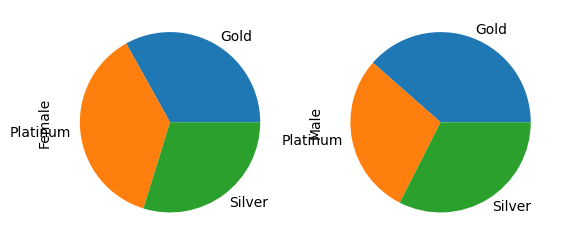

In [438]:
pie = Data_360.groupby(['Segment','gender'])['claim_amount'].sum().reset_index()
pie.pivot(index="Segment", columns= "gender", values= "claim_amount").plot(kind = "pie", subplots= True, legend= False)
plt.show()

# 12. Among males and females, which gender had claimed the most for any type of driver related issues? 

In [439]:
bar = Data_360[(Data_360.incident_cause.str.lower().str.contains("driver", na=False))].groupby(["gender"])[["gender"]].count().add_prefix("count_").reset_index()

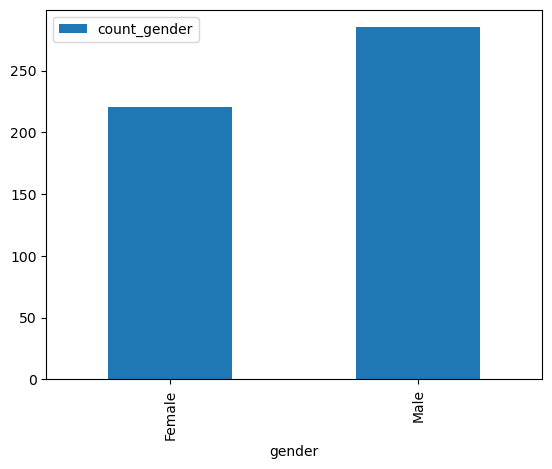

In [440]:
pd.pivot_table(bar,index="gender",values="count_gender").plot(kind = "bar")
plt.show()

## 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [441]:
Data_360.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Claim_date,flag,age,age_category
184,69348631,154557,Driver error,04/10/2018,Auto,No,Injury only,12444.72714,1.0,Yes,Female,1978-05-23,DE,9628791238,Platinum,2018-04-10,1,46,Adult
829,40953049,263204,Other causes,04/04/2018,Auto,No,Material and injury,39192.00000,1.0,Yes,Male,1972-12-20,TX,1738926314,Silver,2018-04-04,1,52,Adult


In [442]:
Bar = Data_360.groupby('age_category')['fraudulent'].count().reset_index()
Bar

C:\Users\hp\AppData\Local\Temp\ipykernel_19244\3693120346.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Bar = Data_360.groupby('age_category')['fraudulent'].count().reset_index()


,age_category,fraudulent
0,Children,0
1,Youth,174
2,Adult,919
3,Senior,0


C:\Users\hp\AppData\Local\Temp\ipykernel_19244\1901673757.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(Bar,index="age_category",values="fraudulent").plot(kind = "bar")


<Axes: xlabel='age_category'>

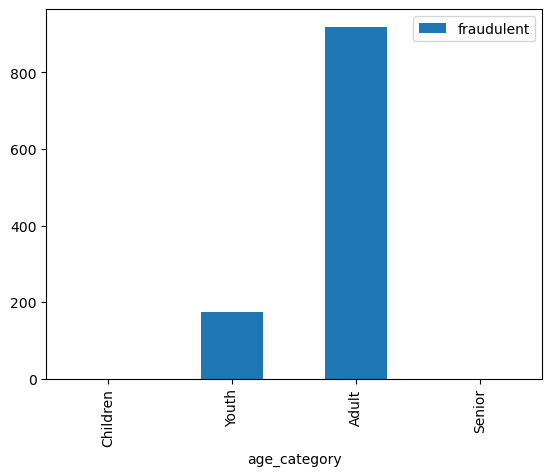

In [443]:
pd.pivot_table(Bar,index="age_category",values="fraudulent").plot(kind = "bar")

## 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a 
chronological order not alphabetical order.   

In [444]:
Data_360['Month_num'] = pd.DatetimeIndex(Data_360.claim_date).month
mon_trend = Data_360.groupby('Month_num')['claim_amount'].sum().reset_index()
mon_trend

,Month_num,claim_amount
0,1,1.331832e+06
1,2,1.156579e+06
2,3,1.348315e+06
3,4,1.276020e+06
4,5,1.115035e+06
5,6,1.317728e+06
6,7,1.382493e+06
7,8,9.134147e+05
8,9,9.803903e+05
9,10,1.428671e+06


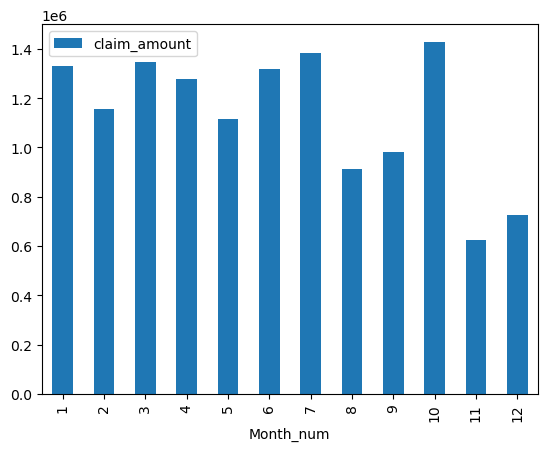

In [445]:
pd.pivot_table(mon_trend,index='Month_num',values="claim_amount").plot(kind = "bar")
plt.show()

##15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that 
represents fraudulent claims and the other for non-fraudulent claims

In [446]:
fraud = Data_360[(Data_360.fraudulent=="Yes")].groupby(["gender","age_category"])[["claim_amount"]].mean().add_prefix("Fraud_")
fraud

C:\Users\hp\AppData\Local\Temp\ipykernel_19244\3284295744.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud = Data_360[(Data_360.fraudulent=="Yes")].groupby(["gender","age_category"])[["claim_amount"]].mean().add_prefix("Fraud_")


Fraud_claim_amount
gender age_category                    
Female Children                     NaN
       Youth               10137.465893
       Adult               11206.352883
       Senior                       NaN
Male   Children                     NaN
       Youth                8934.081809
       Adult               15589.206751
       Senior                       NaN

In [447]:
non_fraud = Data_360[(Data_360.fraudulent=="No")].groupby(["gender","age_category"])[["claim_amount"]].mean().add_prefix("Non_Fraud_")
non_fraud

C:\Users\hp\AppData\Local\Temp\ipykernel_19244\3845917716.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  non_fraud = Data_360[(Data_360.fraudulent=="No")].groupby(["gender","age_category"])[["claim_amount"]].mean().add_prefix("Non_Fraud_")


Non_Fraud_claim_amount
gender age_category                        
Female Children                         NaN
       Youth                   13147.120315
       Adult                   12276.803706
       Senior                           NaN
Male   Children                         NaN
       Youth                   13273.444838
       Adult                   11939.142491
       Senior                           NaN

In [448]:
fraud_non_fraud=round(pd.merge(fraud,non_fraud,on=["gender","age_category"]),2)
fraud_non_fraud

Fraud_claim_amount  Non_Fraud_claim_amount
gender age_category                                            
Female Children                     NaN                     NaN
       Youth                   10137.47                13147.12
       Adult                   11206.35                12276.80
       Senior                       NaN                     NaN
Male   Children                     NaN                     NaN
       Youth                    8934.08                13273.44
       Adult                   15589.21                11939.14
       Senior                       NaN                     NaN

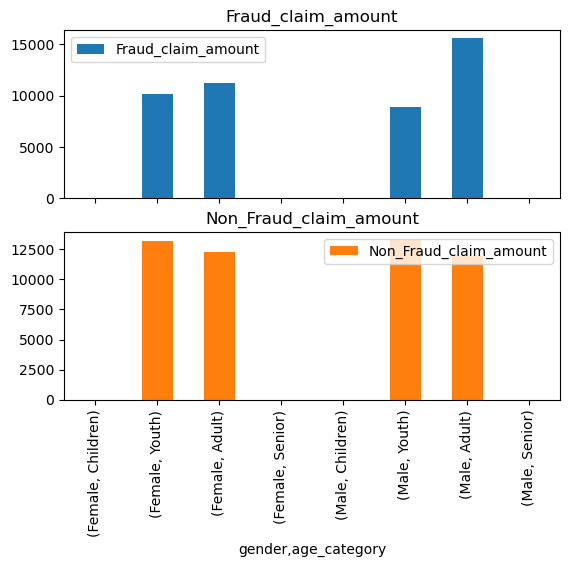

In [449]:
fraud_non_fraud.plot(kind="bar", subplots= True, legend= True)
plt.show()

##16. Is there any similarity in the amount claimed by males and females

In [450]:
# Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
# Data in each group must be obtained via a random sample from the population.
# Data in each group are normally distributed.
# Data values are continuous.
# The variances for the two independent groups are equal.
#As the significance value of t test is greater than 0.05 we can safely conclude that there is a similarity in amount claimed by males and females.

In [451]:
import scipy.stats as st
female = Data_360['claim_amount'].loc[Data_360['gender']=="Female"]
male = Data_360['claim_amount'].loc[Data_360['gender']=="Male"]
st.ttest_ind(female, male, equal_var=False)

TtestResult(statistic=-0.8225034618130944, pvalue=0.4109704473242838, df=1089.15788367314)

In [452]:
pvalue=0.3762586388329351

In [453]:
if pvalue>0.05:
   print('there is a similarity in amount claimed by males and females')
else:
   print('no similarity')

there is a similarity in amount claimed by males and females


## 17. Is there any relationship between age category and segment?

In [454]:
# Chi Square test:
# H0 = No relation between category and segment
# Ha = There is a relationship between category and segment
# Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. 
#Therefore there is no relationship between age category and segment

In [455]:
c = pd.crosstab(Data_360.age_category, Data_360.Segment, margins = True)
st.chi2_contingency(observed= c)

Chi2ContingencyResult(statistic=0.9547625029386648, pvalue=0.9872691673495114, dof=6, expected_freq=array([[  61.44922232,   57.46935041,   55.08142726,  174.        ],
       [ 324.55077768,  303.53064959,  290.91857274,  919.        ],
       [ 386.        ,  361.        ,  346.        , 1093.        ]]))

In [456]:
pvalue=0.9975425572218226

In [457]:
if pvalue>0.05:
   print('fail to reject H0 = No relation between category and segment')
else:
   print('reject H0')

fail to reject H0 = No relation between category and segment


##18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000

In [458]:
Data_360['year'] = pd.DatetimeIndex(Data_360.claim_date).year

In [459]:
CY = Data_360.loc[Data_360.year == 2018]["claim_amount"]
PY = Data_360.loc[Data_360.year == 2017]["claim_amount"]
CY.corr(other= PY)

nan

## 19. Is there any difference between age groups and insurance claims?

In [460]:
# ANOVA:
# H0 = No relation between category and segment
# Ha = There is a relationship between category and segment
# Since the significance value of the test is greater than 0.05, we fail reject the null hypothesis.
#Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims

In [461]:
Y = Data_360['total_policy_claims'].loc[Data_360['age_category']=="Youth"]
A = Data_360['total_policy_claims'].loc[Data_360['age_category']=="Adult"]
st.f_oneway(Y,A)

F_onewayResult(statistic=1.001195905895886, pvalue=0.3172431762497246)

In [462]:
pvalue=0.3172431762497246

In [463]:
if pvalue>0.05:
   print('fail to reject H0')
else:
   print('reject H0')

fail to reject H0


## 20. Is there any relationship between total number of policy claims and the claimed amount

In [464]:
# As the correlation is negative the number of policy claims in inversely propotional to the claimed amount.

In [465]:
Data_360.total_policy_claims.corr(other= Data_360.claim_amount)

-0.0169221288666006